### Get the Optimal Cluster

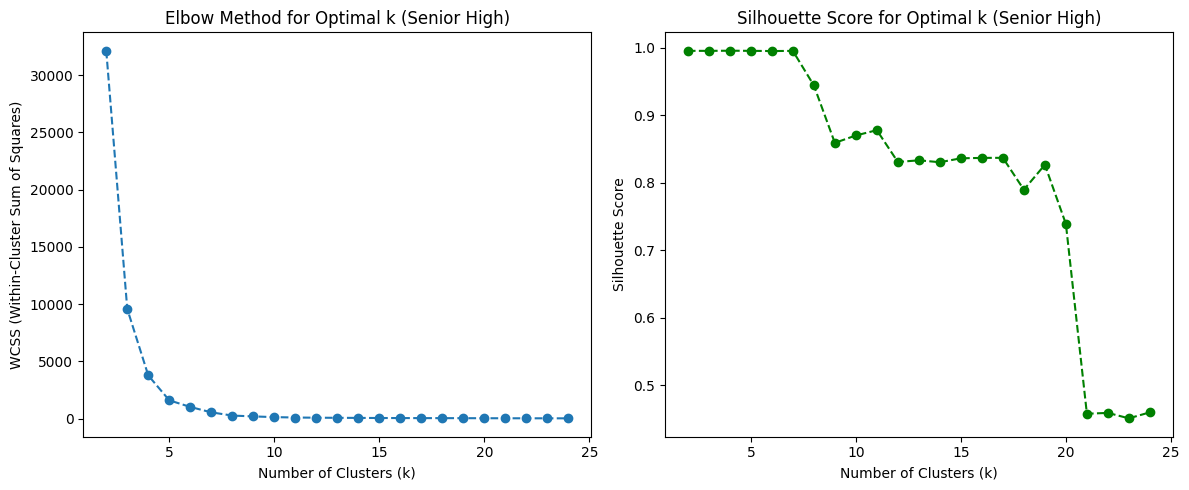

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data
file_path = 'C:/capstone development phase/shs.csv'
df = pd.read_csv(file_path)

# Extract latitude and longitude
X = df[['latitude', 'longitude']].values

# Initialize lists
wcss = []  # Store Within-Cluster Sum of Squares (WCSS)
silhouette_scores = []  # Store Silhouette Scores

K_range = range(2, 25)  # Start from k=2 because silhouette_score is not defined for k=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)  # Store WCSS (inertia)
    
    # Compute Silhouette Score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Method (WCSS)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k (Senior High)')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (Senior High)')

plt.tight_layout()
plt.show()

### Plot

In [1]:
# senior high student data cluster

import pandas as pd
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the student data (Ensure you replace this with your actual CSV path)
df = pd.read_csv('C:/capstone development phase/shs.csv')

# ✅ 1️⃣ Address-Based Filtering (Province or Full Address)
df = df[
    df['province'].str.contains('Cebu', na=False, case=False) |
    df['full_address'].str.contains('Cebu', na=False, case=False)
]

# ✅ 2️⃣ Latitude-Longitude Filtering (Strict Range)
df = df[
    (df['latitude'] >= 9.5) & (df['latitude'] <= 11.3) &  # Excludes Negros & Dumaguete
    (df['longitude'] >= 123.5) & (df['longitude'] <= 124.1)  # Removes Bohol & Leyte
]

# ✅ Check unique lat-lon pairs
unique_lat_long = df[['latitude', 'longitude']].drop_duplicates()
num_unique_pairs = unique_lat_long.shape[0]
print(f"Number of unique latitude and longitude pairs: {num_unique_pairs}")

# ✅ Apply K-Means Clustering
k = 6  # Optimal K determined from elbow method & silhouette score
print(f"Using {k} clusters for K-Means clustering.")

X = df[['latitude', 'longitude']].values
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster_proximity'] = kmeans.fit_predict(X)

# ✅ Save clustered data
output_filename = "clustered_shs_students.csv"
df.to_csv(output_filename, index=False)
print(f"Clustered data saved as {output_filename}")

# 📊 **Visualization of Clusters**
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='longitude', y='latitude', 
    hue='cluster_proximity', palette='tab10', 
    alpha=0.7, edgecolor='black'
)
plt.title('K-Means Clustering of Student Locations in Cebu')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 🌍 **Folium Map Visualization**
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Loop through and add markers
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster {row['cluster_proximity']}<br>Address: {row.get('full_address', 'N/A')}",
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Save map as an HTML file
map_filename = "shs_kmeans_cluster_map_k6.html"
m.save(map_filename)
print(f"Map saved as {map_filename}. Open this file in a browser to view the clusters.")


ModuleNotFoundError: No module named 'folium'